## Uppgift 1 (3p)
Förklara vad den här koden gör och vad som ritas ut:
```py
import matplotlib.pyplot as plt

x = list(range(10)) 
y = [i**2 for i in x]
fig, ax = plt.figure(), plt.axes()
ax.plot(x,y)
ax.set(title="Plot", xlabel="x", ylabel="y")
```
Skriv en kort kommentar för varje rad.

[Text(0.5, 1.0, 'Plot'), Text(0.5, 0, 'x'), Text(0, 0.5, 'y')]

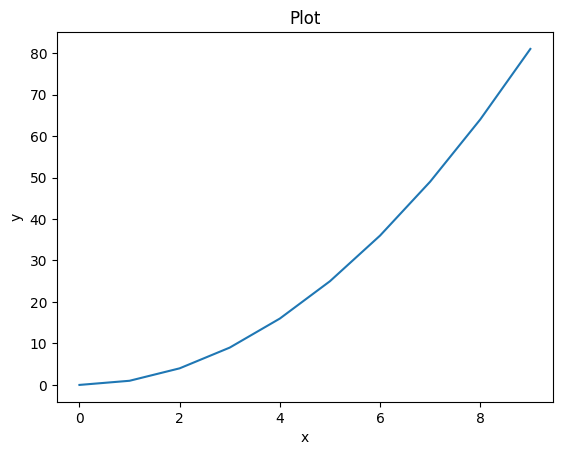

In [20]:
import matplotlib.pyplot as plt                 # Importerar matplotlib.pyplot modulen med namn plt

x = list(range(10))                             #skapar en lista med siffror 0-9
y = [i**2 for i in x]                           # höjer upp varje index i x till 2. så 0**2, 1**2, 2**2, ..., 9**2
fig, ax = plt.figure(), plt.axes()              # Skapar variabler med funktioner ifrån Matplotlib.pyplot som vi döpt till plt
ax.plot(x,y)                                    # Tar värdena i våran x lista och y lista och plottar.
ax.set(title="Plot", xlabel="x", ylabel="y")    # sätter namn och vädern i våran graf


## Uppgift 2 (3p)
Simulera 1000000 tärningskast och beräkna antalet ettor, tvåor, treor, fyror, femmor och sexor. Spara
resultatet i en lämplig datastruktur.

In [21]:
import random as rnd

rolls = [rnd.randint(1,6) for i in range(1000000)]
dice_rolls = dict(
roll1 = rolls.count(1),
roll2 = rolls.count(2),
roll3 = rolls.count(3),
roll4 = rolls.count(4),
roll5 = rolls.count(5),
roll6 = rolls.count(6)
)

print(dice_rolls)

{'roll1': 166727, 'roll2': 166886, 'roll3': 165731, 'roll4': 167021, 'roll5': 167151, 'roll6': 166484}


 ## Uppgift 3 (3p)
Skriv en funktion som tar in en radie som inparameter och som returnerar volymen av en sfär. Volymen för en
sfär är:
$$V_{sphere} = \frac{4}{3}\pi r^3$$
Låt användaren mata in ett tal och kör funktionen. Tänk på att ta med lämplig felhantering.

In [24]:

from __future__ import annotations
from math import pi
from typing import Type

def calc_sphere_volume(radius: (int | float)):
	"""calculates volume of sphere of a given radius"""
	if not isinstance(radius, (int, float)):
		raise TypeError(f"Radius must be int or float, not {type(radius).__name__}") #.__name__ returns changes <class str> to str.
	if radius <= 0:
		raise ValueError(f"Radius must be a positive value, not {radius}")
	return (4*pi*(radius**3))/3

#calc_sphere_volume(float(input("Enter radius of sphere to calculate its volume: ")))

while True:
	user_input = input("Enter radius to calculate the volume")
	try:
		user_input = float(user_input)
		calc_sphere_volume(user_input)
		break
	except TypeError as err:
		print(err)
	except ValueError as err:
		print(err)

## Uppgift 4 (3p)
Läs in en textfil som heter bamba.txt och innehåller:
```
v42
Chili sin carne 
Pannkakor
Ärtsoppa
Kebab
Vegetarisk lasagne
```
Läs in texterna och skriv ut dem i terminalen

In [4]:

file_path = "bamba.txt"
week = ["mån", "tis", "ons","tors","fre","lör"]
count = 0


with open(file_path, "r") as read_file:
	for lines in read_file:
		print(f"{lines+week[count]}")
		count += 1


v42
mån
Chili sin carne 
tis
Pannkakor
ons
Ã„rtsoppa
tors
Kebab
fre
Vegetarisk lasagnelör


In [34]:
with open ("bamba.txt", "r") as f:
    lines = f.readlines()
    
weekdays = ["","mån", "tis", "ons", "tors", "fre"]
both = [weekdays, lines]

for i in zip(*both):
    print(*i, end="")

 v42
mån Chili sin carne 
tis Pannkakor
ons Ã„rtsoppa
tors Kebab
fre Vegetarisk lasagne

## Uppgift 5 (3p)
Skapa en funktion som tar in två punkter i 2D , och som returnerar tillbaka avståndet mellan
dessa. Anropa därefter denna funktion för test
Det finns en textfil som heter testpunkter.txt som ligger i undermappen testpoints och innehåller:
```
Punkt 1, punkt 2 
(1,2), (0,0)
(2,0), (3,5)
...
(-2,-2), (9,2)
```

In [43]:

with open ("testpunkter.txt", "r") as f_read: # should be with open("testpoints/testpunkter.txt", "r")
	lines = f_read.readlines()
	lines.pop(0)
	
	lines_clean = []
	for line in lines:
		line = line.replace("()\n ") #removes unnecesery symbols.
	
		lines_clean.append(line)
		
	lines_split = []
	for line in lines_clean:
		lines_split.append(line.split(",")) # "1,2,0,0" -> ["1", "2", "0", "0"}
	
	lines_float = []
	for line in lines_split:
		for index in line:
			lines_float.append(float(index)) # converts to float.

print(lines_float)

[1.0, 2.0, 0.0, 0.0, 2.0, 0.0, 3.0, 5.0]


In [23]:
# Get into folder testpoints
# read testpunkter.txt
# clean testpunkter.txt
# from math import sqrt
# create function that calculates

## Uppgift 6 (4p)
I den här uppgiften ska du skapa ett blackjack som är ett kortspel. Förenklat är reglerna för blackjack:

- dealern tar två kort
- dealern visar sitt första kort
- spelaren tar två kort
- spelaren får välja att ta nytt kort eller stanna
- när spelaren stannar räknar man poängen genom:

- - J, K, Q värda 10p
- - A värd 1 eller 11
- - Övriga kort värda deras valör

- om spelarens poäng mindre eller lika med 21, vinner spelaren om hens poäng överstiger dealerns,
annars vinner dealern